# Assignment for practical work 4. Basics of neural networks

Group:

*  Jannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

#### Notes:

* Other than in assignment 2a we will now use the original response variable "LeagueIndex" for classification.

* Also, we will split the data into train and test set and perform cross-validation on the training data instead of splitting the training data into fixed train/validation sets.

## General Assignment

Before performing the practical work, you need download the data set accordingly to the option on your machine
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)
2. Build a model using Perceptron (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and MLPClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). On the basis of experiments, select values for learning rate, the regularization parameter, the optimization function.
3. Build learning curves for better explanation of your experiments.

## Options
Data sets are taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/
The option is determined by the data set, which can be downloaded from the link above:
1. Condition Based Maintenance of Naval Propulsion Plants
2. UJIIndoorLoc
3. Insurance Company Benchmark (COIL 2000)
4. KDD Cup 1998 Data
5. [Forest Fires](https://www.kaggle.com/elikplim/predict-the-burned-area-of-forest-fires)
6. Concrete Compressive Strength
7. Concrete Slump Test
8. Communities and Crime
9. Parkinsons Telemonitoring
10. YearPredictionMSD
11. Relative location of CT slices on axial axis
12. Individual household electric power consumption
13. Energy efficiency
14. 3D Road Network (North Jutland, Denmark)
15. ISTANBUL STOCK EXCHANGE
16. Buzz in social media
17. Physicochemical Properties of Protein Tertiary Structure
18. Gas Sensor Array Drift Dataset at Different Concentrations
19. SkillCraft1 Master Table Dataset
20. SML2010
21. Bike Sharing Dataset
22. Combined Cycle Power Plant
23. BlogFeedback

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")

In [3]:
#df = df.drop("GameID", axis=1)

In [4]:
response_label_names = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "GrandMaster", "Professional"]
# response_indices = range(1,9)
# response_labels = dict(zip(response_indices, response_label_names))
# response_labels

In [5]:
# df.LeagueIndex = df.LeagueIndex.apply(lambda x: response_labels[x])

In [6]:
# pd.LeagueIndex = pd.Series(pd.Categorical(df.LeagueIndex, categories=response_label_names, ordered=True), dtype="category")

In [7]:
df.LeagueIndex.describe()

count    3395.000000
mean        4.184094
std         1.517327
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: LeagueIndex, dtype: float64

### EDA

In [8]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [9]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [10]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null object
HoursPerWeek            3395 non-null object
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non

In [12]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
missing_features = ["Age", "HoursPerWeek", "TotalHours"]

for col in missing_features:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [13]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [14]:
df.groupby("LeagueIndex").describe()

GameID                                                        \
             count          mean          std      min      25%      50%   
LeagueIndex                                                                
1            167.0   4427.359281  2497.138956     61.0   2327.0   3927.0   
2            347.0   4668.334294  2661.785466     60.0   2462.0   4421.0   
3            553.0   4725.052441  2710.086234     57.0   2404.0   4665.0   
4            811.0   4715.130703  2628.611247     56.0   2446.0   4743.0   
5            806.0   4704.777916  2693.406723     52.0   2313.0   5047.5   
6            621.0   4843.792271  2629.977338    138.0   2549.0   5227.0   
7             35.0   4683.771429  2867.112732     72.0   2052.5   4754.0   
8             55.0  10051.509091    25.894281  10001.0  10028.5  10052.0   

                                  Age             ... ComplexUnitsMade  \
                  75%      max  count       mean  ...              75%   
LeagueIndex                                       ...                    
1             6260.00   9224.0  167.0  22.724551  ...         0.000000   
2             6839.50   9243.0  347.0  22.155620  ...         0.000000   
3             6974.00   9270.0  553.0  22.050633  ...         0.000034   
4             6990.00   9271.0  811.0  21.981504  ...         0.000099   
5             7059.25   9264.0  806.0  21.362283  ...         0.000132   
6             7119.00   9255.0  621.0  20.677939  ...         0.000127   
7             7336.50   9202.0   35.0  21.171429  ...         0.000121   
8            10072.50  10095.0    0.0        NaN  ...         0.000000   

                      ComplexAbilitiesUsed                                \
                  max                count      mean       std  min  25%   
LeagueIndex                                                                
1            0.000318                167.0  0.000042  0.000096  0.0  0.0   
2            0.000494                347.0  0.000076  0.000200  0.0  0.0   
3            0.000590                553.0  0.000117  0.000257  0.0  0.0   
4            0.000786                811.0  0.000138  0.000245  0.0  0.0   
5            0.000902                806.0  0.000176  0.000282  0.0  0.0   
6            0.000781                621.0  0.000182  0.000293  0.0  0.0   
7            0.000386                 35.0  0.000267  0.000588  0.0  0.0   
8            0.000457                 55.0  0.000135  0.000246  0.0  0.0   

                                           
                  50%       75%       max  
LeagueIndex                                
1            0.000000  0.000045  0.000630  
2            0.000000  0.000057  0.001763  
3            0.000000  0.000129  0.002664  
4            0.000029  0.000176  0.002186  
5            0.000066  0.000229  0.003084  
6            0.000053  0.000269  0.002443  
7            0.000040  0.000235  0.002685  
8            0.000000  0.000128  0.000959  

[8 rows x 152 columns]

### Splitting the dataset into train/test

Before doing any modeling

In [15]:
train_X, test_X, train_y, test_y = train_test_split(df.drop("LeagueIndex",axis=1), 
                                                    df["LeagueIndex"], 
                                                    train_size=0.7, 
                                                    random_state=42)

### Feature normalization

Here we scale all numerical variables and impute the missing values in "Age", "HoursPerWeek" and "TotalHours".

In [16]:
remaining_features = train_X.columns.drop(missing_features)

numeric_transformer = Pipeline([('scale', StandardScaler())])
imputer = Pipeline([('impute', SimpleImputer(strategy='median')), 
                     ('scale', numeric_transformer)])



preprocessor = ColumnTransformer(
    transformers=[
        ('imp', imputer, missing_features),
        ('num', numeric_transformer, remaining_features)])

In [17]:
train_X = pd.DataFrame(preprocessor.fit_transform(train_X), columns=train_X.columns)

In [18]:
train_X.describe()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03,2.376000e+03
mean,-2.104564e-16,-4.037175e-17,2.242875e-17,-7.177199e-17,-2.392400e-16,7.177199e-17,2.541925e-17,-1.315820e-16,9.719124e-17,1.166295e-16,-1.151342e-16,2.601735e-16,-6.018381e-16,-5.233375e-16,-1.943825e-16,6.205287e-17,-1.958777e-16,-4.186700e-17,5.382900e-17
std,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00
min,-1.368509e+00,-1.126495e+00,-7.478803e-01,-1.788035e+00,-1.863982e+00,-8.395836e-01,-1.669365e+00,-1.880793e+00,-5.948591e-01,-1.028416e+00,-2.772464e+00,-1.905258e+00,-2.025574e+00,-2.133977e+00,-2.298874e+00,-1.832498e+00,-2.432873e+00,-5.384766e-01,-5.289992e-01
25%,-6.424405e-01,-6.358645e-01,-4.059951e-01,-8.535812e-01,-7.265382e-01,-5.855737e-01,-7.532046e-01,-6.029079e-01,-5.948591e-01,-6.544677e-01,-7.193785e-01,-6.687333e-01,-6.848709e-01,-6.674470e-01,-6.922487e-01,-6.675598e-01,-8.267306e-01,-5.384766e-01,-5.289992e-01
50%,-1.583946e-01,-3.087777e-01,-1.702122e-01,5.256470e-02,-1.698743e-01,-3.484128e-01,-9.646948e-02,-1.769462e-01,-3.508204e-01,-2.823798e-01,-7.105596e-02,-2.151201e-01,-1.528493e-01,-1.208925e-01,-2.282138e-02,-2.326193e-01,-2.913499e-01,-5.384766e-01,-4.515787e-01
75%,5.676741e-01,3.453960e-01,1.834621e-01,8.406351e-01,5.317995e-01,1.942286e-01,5.684538e-01,6.749772e-01,1.296912e-01,3.276690e-01,5.716735e-01,4.485489e-01,5.168770e-01,5.180762e-01,6.466059e-01,4.337626e-01,7.794116e-01,2.398076e-01,1.548541e-01
max,5.408133e+00,1.244761e+01,2.871319e+01,1.950526e+00,4.852003e+00,7.497891e+00,6.093933e+00,2.378824e+00,1.774746e+01,9.517732e+00,4.463879e+00,1.116190e+01,5.753285e+00,8.392036e+00,4.797055e+00,7.866918e+00,3.456315e+00,7.489600e+00,1.073505e+01


## Classifictation with the Perceptron

In [199]:
perc = Perceptron(random_state=42, n_jobs=1, alpha=0.001)
perc.fit(train_X, train_y)

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=1,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [200]:
test_X = pd.DataFrame(preprocessor.fit_transform(test_X), columns=test_X.columns)
np.mean(test_y == perc.predict(test_X))

0.2718351324828263

In [237]:
params_perceptron = {'alpha': 10**np.linspace(-4, -2, 4),
                     'eta0': 10**np.linspace(0, 1, 7),
                     'max_iter' : [1000],
                     'penalty': ['l1']
                    }

grid_perc = GridSearchCV(Perceptron(n_jobs=-1, random_state=42, verbose=False), 
                         param_grid=params_perceptron, 
                         n_jobs=-1, 
                         cv=3)
grid_perc.fit(train_X, train_y)

print("Best parameters: {}".format(grid_perc.best_params_))
print("Best accuracy cv-score: {}".format(grid_perc.best_score_))
print("Best test accuracy score: {}".format(accuracy_score(grid_perc.predict(test_X), test_y)))

Best parameters: {'alpha': 0.00046415888336127773, 'eta0': 6.812920690579611, 'max_iter': 1000, 'penalty': 'l1'}
Best accuracy cv-score: 0.3265993265993266
Best test accuracy score: 0.27379784102060845


In [265]:
params_mlp = {'hidden_layer_sizes':[(x,x) for x in range(50, 170, 20)], 
              'activation':['relu', 'tanh', 'identity'], 
              'learning_rate_init' : [0.1]}

In [266]:
grid_mlp = GridSearchCV(MLPClassifier(random_state=42, alpha=0.5), param_grid=params_mlp, cv=5, n_jobs=-1, verbose=10)

In [267]:
grid_mlp.fit(train_X, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.5,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=...e=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'identity'],
           

In [268]:
grid_mlp.best_score_

0.4238215488215488

In [269]:
grid_mlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (130, 130),
 'learning_rate_init': 0.1}

In [270]:
accuracy_score(grid_mlp.predict(test_X), test_y)

0.323846908734053

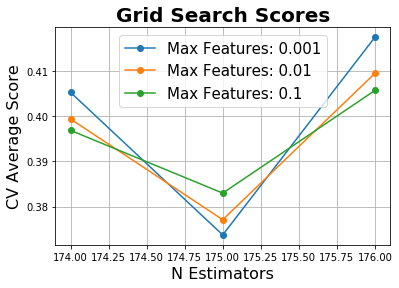

In [143]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid_mlp.cv_results_, params_mlp['hidden_layer_sizes'], params_mlp['learning_rate_init'], 'N Estimators', 'Max Features')